# Зміст
1. Підготовка даних до аналізу
2. Аналіз результатів АВ-тесту
3. Висновки і пропозиції

# 1. Підготовка даних до аналізу

### Імпорт бібліотек Python для аналізу та візуалізації даних

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

### Створення датасету на основі csv файлу

In [2]:
data = pd.read_csv('ab_test_data.csv', sep=';')
data

,sender_id,platform_id,time_stamp,gender,reg_date
0,3207526951,6,16.03.2017 13:35,m,26.01.2017
1,3207526951,6,16.03.2017 9:09,m,26.01.2017
2,3207526951,6,16.03.2017 9:09,m,26.01.2017
3,3207526951,6,16.03.2017 12:13,m,26.01.2017
4,3207526951,6,15.03.2017 14:01,m,26.01.2017
...,...,...,...,...,...
768434,3208782485,6,23.03.2017 1:11,m,01.02.2017
768435,3208782485,6,23.03.2017 1:11,m,01.02.2017
768436,3208782485,6,23.03.2017 1:10,m,01.02.2017
768437,3208782485,6,23.03.2017 1:10,m,01.02.2017


### Пошук пропущених значень

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768439 entries, 0 to 768438
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   sender_id    768439 non-null  int64 
 1   platform_id  768439 non-null  int64 
 2   time_stamp   768439 non-null  object
 3   gender       768439 non-null  object
 4   reg_date     768439 non-null  object
dtypes: int64(2), object(3)
memory usage: 29.3+ MB


In [4]:
data['sender_id'].value_counts()

sender_id
3204314070    6050
3204411481    4974
3202057642    4458
3213922747    3850
3204297224    3777
              ... 
3216182987       1
3216186142       1
3216185970       1
3217426915       1
3208726766       1
Name: count, Length: 26321, dtype: int64

In [5]:
data['platform_id'].value_counts()

platform_id
6    446092
7    322347
Name: count, dtype: int64

In [6]:
data['time_stamp'].value_counts()

time_stamp
14.03.2017 14:26    239
15.03.2017 17:03    237
25.03.2017 18:29    230
15.03.2017 10:35    212
13.03.2017 11:09    212
                   ... 
19.03.2017 2:40       2
23.03.2017 5:37       2
26.03.2017 15:15      2
21.03.2017 23:25      1
27.03.2017 0:00       1
Name: count, Length: 20100, dtype: int64

In [7]:
data['gender'].value_counts()

gender
m    659569
f    108699
        171
Name: count, dtype: int64

In [8]:
data['reg_date'].value_counts()

reg_date
13.03.2017    31548
14.03.2017    28913
16.03.2017    22395
15.03.2017    21622
17.03.2017    20484
              ...  
01.02.2017     3957
14.02.2017     3654
15.01.2017     3641
12.02.2017     3607
10.01.2017     2895
Name: count, Length: 85, dtype: int64

Датасет не містить NaN значень, але в колонці 'gender' є 171 рядок, у яких не вказано гендер.  Для цілей аналізу замінимо пусті значення на 'nb' (небінарний гендер) і виведемо оновлені дані - як видно, всі порожні дані замінено на 'nb'

In [9]:
data['gender'] = data['gender'].replace(' ', 'nb')
data['gender'].value_counts()

gender
m     659569
f     108699
nb       171
Name: count, dtype: int64

### Конвертація дати у стандартний формат

In [10]:
data['time_stamp'] = pd.to_datetime(data['time_stamp'])
data['reg_date'] = pd.to_datetime(data['reg_date']).dt.date
data

C:\Users\user\AppData\Local\Temp\ipykernel_14420\1177350865.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['time_stamp'] = pd.to_datetime(data['time_stamp'])
C:\Users\user\AppData\Local\Temp\ipykernel_14420\1177350865.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['reg_date'] = pd.to_datetime(data['reg_date']).dt.date


,sender_id,platform_id,time_stamp,gender,reg_date
0,3207526951,6,2017-03-16 13:35:00,m,2017-01-26
1,3207526951,6,2017-03-16 09:09:00,m,2017-01-26
2,3207526951,6,2017-03-16 09:09:00,m,2017-01-26
3,3207526951,6,2017-03-16 12:13:00,m,2017-01-26
4,3207526951,6,2017-03-15 14:01:00,m,2017-01-26
...,...,...,...,...,...
768434,3208782485,6,2017-03-23 01:11:00,m,2017-02-01
768435,3208782485,6,2017-03-23 01:11:00,m,2017-02-01
768436,3208782485,6,2017-03-23 01:10:00,m,2017-02-01
768437,3208782485,6,2017-03-23 01:10:00,m,2017-02-01


### Перевірка логіки дат (time_stamp має бути не пізніше reg_date)

In [11]:
data[data['time_stamp'] < data['reg_date']]

,sender_id,platform_id,time_stamp,gender,reg_date
102670,3216840863,7,2017-03-13 23:56:00,f,2017-03-14
102671,3216840863,7,2017-03-13 23:56:00,f,2017-03-14
102672,3216840863,7,2017-03-13 23:56:00,f,2017-03-14
102673,3216840863,7,2017-03-13 23:55:00,f,2017-03-14
143056,3217416110,7,2017-03-16 23:59:00,m,2017-03-17
143063,3217416110,7,2017-03-16 23:58:00,m,2017-03-17
143073,3217416110,7,2017-03-16 23:59:00,m,2017-03-17
143077,3217416110,7,2017-03-16 23:58:00,m,2017-03-17
160106,3217796830,7,2017-03-18 23:59:00,m,2017-03-19
316622,3218939019,7,2017-03-24 23:56:00,f,2017-03-25


У датасеті є рядки, у яких time_stamp раніше reg_date.  
В усіх випадках time_stamp знаходиться в межах останніх 5 хвилин доби, яка передує дню реєстрації.  
Оскільки в цьому може бути логіка (наприклад, налаштування системи), а також враховуючи незначну кількість таких випадків, ми не будемо вносити зміни в датасет. 

### Класифікація даних на 2 категорії: дані, зібрані до АВ-тесту, і дані, зібрані під час АВ-тесту

In [12]:
data['event_type'] = np.where(data['time_stamp'] < pd.Timestamp('2017-03-24 16:00:00'), 'before_test', 'test')
data.head(600000)

,sender_id,platform_id,time_stamp,gender,reg_date,event_type
0,3207526951,6,2017-03-16 13:35:00,m,2017-01-26,before_test
1,3207526951,6,2017-03-16 09:09:00,m,2017-01-26,before_test
2,3207526951,6,2017-03-16 09:09:00,m,2017-01-26,before_test
3,3207526951,6,2017-03-16 12:13:00,m,2017-01-26,before_test
4,3207526951,6,2017-03-15 14:01:00,m,2017-01-26,before_test
...,...,...,...,...,...,...
599995,3208565937,6,2017-03-26 11:10:00,f,2017-01-31,test
599996,3208576331,7,2017-03-26 12:07:00,f,2017-01-31,test
599997,3208578098,6,2017-03-26 12:50:00,m,2017-01-31,test
599998,3208578098,6,2017-03-26 12:51:00,m,2017-01-31,test


### Класифікація користувачів на контрольну (control) і тестову (treatment) групи:

In [13]:
conditions = [
    ((data['event_type'] == 'test') & (data['sender_id'] % 2 == 0)),
    ((data['event_type'] == 'test') & (data['sender_id'] % 2 != 0)),
    (data['event_type'] == 'before_test')
]
choices = ['control', 'treatment', 'na'] # na (not applicable) - події до запуску АВ-тесту
data['group'] = np.select(conditions, choices)
data.head(600000)

,sender_id,platform_id,time_stamp,gender,reg_date,event_type,group
0,3207526951,6,2017-03-16 13:35:00,m,2017-01-26,before_test,na
1,3207526951,6,2017-03-16 09:09:00,m,2017-01-26,before_test,na
2,3207526951,6,2017-03-16 09:09:00,m,2017-01-26,before_test,na
3,3207526951,6,2017-03-16 12:13:00,m,2017-01-26,before_test,na
4,3207526951,6,2017-03-15 14:01:00,m,2017-01-26,before_test,na
...,...,...,...,...,...,...,...
599995,3208565937,6,2017-03-26 11:10:00,f,2017-01-31,test,treatment
599996,3208576331,7,2017-03-26 12:07:00,f,2017-01-31,test,treatment
599997,3208578098,6,2017-03-26 12:50:00,m,2017-01-31,test,control
599998,3208578098,6,2017-03-26 12:51:00,m,2017-01-31,test,control


### Створення двох окремих датасетів для подій до запуску АВ-тесту і після запуску

In [14]:
data_before_test = data[data['event_type'] == 'before_test']
data_before_test

,sender_id,platform_id,time_stamp,gender,reg_date,event_type,group
0,3207526951,6,2017-03-16 13:35:00,m,2017-01-26,before_test,na
1,3207526951,6,2017-03-16 09:09:00,m,2017-01-26,before_test,na
2,3207526951,6,2017-03-16 09:09:00,m,2017-01-26,before_test,na
3,3207526951,6,2017-03-16 12:13:00,m,2017-01-26,before_test,na
4,3207526951,6,2017-03-15 14:01:00,m,2017-01-26,before_test,na
...,...,...,...,...,...,...,...
768434,3208782485,6,2017-03-23 01:11:00,m,2017-02-01,before_test,na
768435,3208782485,6,2017-03-23 01:11:00,m,2017-02-01,before_test,na
768436,3208782485,6,2017-03-23 01:10:00,m,2017-02-01,before_test,na
768437,3208782485,6,2017-03-23 01:10:00,m,2017-02-01,before_test,na


In [15]:
data_test = data[data['event_type'] == 'test']
data_test

,sender_id,platform_id,time_stamp,gender,reg_date,event_type,group
150161,3218632174,7,2017-03-26 07:34:00,m,2017-03-23,test,control
150162,3218635027,7,2017-03-26 06:19:00,m,2017-03-23,test,treatment
150163,3218635027,7,2017-03-26 06:19:00,m,2017-03-23,test,treatment
150164,3218635027,7,2017-03-26 06:18:00,m,2017-03-23,test,treatment
150165,3218635027,7,2017-03-26 06:19:00,m,2017-03-23,test,treatment
...,...,...,...,...,...,...,...
729459,3219280750,6,2017-03-26 20:23:00,f,2017-03-26,test,control
729460,3219280834,7,2017-03-26 20:21:00,f,2017-03-26,test,control
729461,3219280834,7,2017-03-26 20:27:00,f,2017-03-26,test,control
729462,3219280834,7,2017-03-26 20:23:00,f,2017-03-26,test,control


### 

# 2. Аналіз результатів АВ-тесту

### Вибір ключової метрики і тесту для оцінки статистичної значущості результатів

Оскільки гіпотеза полягала в тому, що іконка-галочка має збільшити кількість лайків, то цільовою метрикою є __середня кількість лайків на одного користувача (avg_likes_per_user__).  
Для оцінки статистичної значущості результатів АВ-тесту у такому випадку підійде __тест Стьюдента (t-test)__.  
Для аналізу потрібно згрупувати дані у розрізі користувача.

In [17]:
data_by_user = data_test.groupby(['sender_id', 'group']).size().reset_index(name='likes_count')
data_by_user

,sender_id,group,likes_count
0,3201946084,control,3
1,3201948046,control,21
2,3201948762,control,7
3,3201960265,treatment,2
4,3201991474,control,16
...,...,...,...
7328,3219308377,treatment,103
7329,3219308455,treatment,20
7330,3219309969,treatment,8
7331,3219310125,treatment,4


Створюємо списки даних про кількість лайків на користувача для контрольної і тестової групи, які потрібні для тесту Стьюдента:

In [18]:
condition_control = data_by_user['group'] == 'control'
array_control = data_by_user.loc[condition_control, 'likes_count'].values
array_control

array([ 3, 21,  7, ...,  1,  1,  4], dtype=int64)

In [19]:
condition_treatment = data_by_user['group'] == 'treatment'
array_treatment = data_by_user.loc[condition_treatment, 'likes_count'].values
array_treatment

array([2, 1, 1, ..., 8, 4, 5], dtype=int64)

### Тест Стьюдента для оцінки статистичної значущості результатів АВ-тестування

In [126]:
# Дані по контрольній групі
control_likes_per_user = np.array(array_control)
control_users = len(control_likes_per_user)

# Дані по тестовій групі
treatment_likes_per_user = np.array(array_treatment)
treatment_users = len(treatment_likes_per_user)

# Розрахунок середнього значення на стандартного відхилення для кількості лайків на користувача
control_mean = np.mean(control_likes_per_user)
control_std = np.std(control_likes_per_user, ddof=1) 
treatment_mean = np.mean(treatment_likes_per_user)
treatment_std = np.std(treatment_likes_per_user, ddof=1)

# t-test
t_statistic, p_value = stats.ttest_ind_from_stats(mean1=control_mean, std1=control_std, nobs1=control_users,
                                                  mean2=treatment_mean, std2=treatment_std, nobs2=treatment_users)

# Вивести ключову інформацію та висновок щодо статистичної значущості тесту
print(f"Control avg_likes_per_user: {round(control_mean,2)}")
print(f"Treatment avg_likes_per_user: {round(treatment_mean,2)}\n")
print(f"Control standard deviation: {round(control_std,2)}")
print(f"Treatment standard deviation: {round(treatment_std,2)}\n")
print(f"p-value: {round(p_value,3)}\n")
if p_value <= 0.05:
    print("✅ Різниця є статистично значущою")
else:
    print("❌ Різниця НЕ є статистично значущою")

Control avg_likes_per_user: 15.47
Treatment avg_likes_per_user: 13.85

Control standard deviation: 44.78
Treatment standard deviation: 26.28

p-value: 0.061

❌ Різниця НЕ є статистично значущою


### Візуалізація результатів АВ-тесту

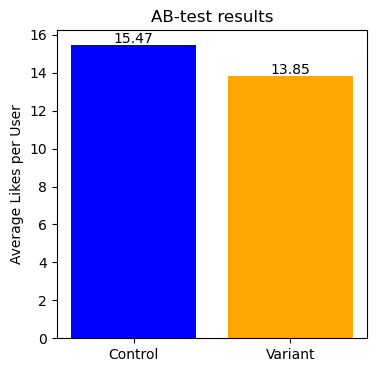

In [48]:
plt.figure(figsize=(4, 4))
plt.bar('Control', control_mean, color='blue', label='Control')
plt.text('Control', control_mean + 0.1, f'{round(control_mean,2)}', ha='center')
plt.bar('Variant', variant_mean, color='orange', label='Variant')
plt.text('Variant', variant_mean + 0.1, f'{round(variant_mean,2)}', ha='center')
plt.title('AB-test results')
plt.ylabel('Average Likes per User')
plt.show()

### Висновок про статистичну значущість результатів АВ-тесту

Тестова група показує нижчу кількість лайків на одного користувача, ніж контрольна група (13.85 і 15.47, відповідно).  
При цьому, __p-value__ становить __0.061__ і це означає, що __різниця НЕ є статистично значущою__ і може бути випадковою.  
Тому рекомендація від аналітика - відхилити тестову версію іконки (галочка) і залишити базовий варіант (іконка-сердечко).

Альтернативно, проведено тест за допомогою онлайн-калькулятора Евана Міллера. Він показує дещо нижче p-value (0.059), але різниця так само НЕ є статистично значущою:

![Ttest by Evan Miller's online calculator](ttest.png)

Для більш повної оцінки результатів АВ-тесту, варто проаналізувати дані у розрізі платформ, гендеру, дати події і когорти (дати реєстрації)

### Результати АВ-тесту у розрізі платформ

In [101]:
data_by_user_platform = data_test.groupby(['sender_id', 'platform_id', 'group']).size().reset_index(name='likes_count')
pivot_table = pd.pivot_table(data_by_user_platform, 
                              index=['group', 'platform_id'], 
                              values=['sender_id', 'likes_count'], 
                              aggfunc={'sender_id': 'count', 'likes_count': ['sum', 'mean']})
pivot_table.columns = ['avg_likes_per_user', 'total_likes', 'total_users']
pivot_table = pivot_table.reset_index()
print(pivot_table)

       group  platform_id  avg_likes_per_user  total_likes  total_users
0    control            6           17.637376        30107         1707
1    control            7           13.379193        27521         2057
2  treatment            6           16.566505        27401         1654
3  treatment            7           11.275862        22563         2001


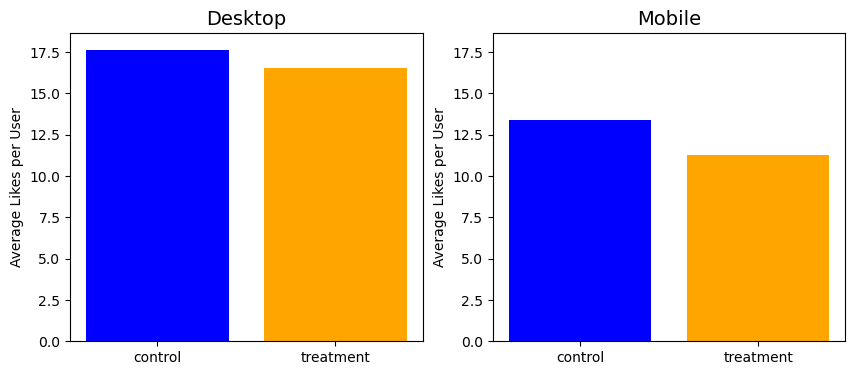

In [102]:
platform_6_data = pivot_table[pivot_table['platform_id'] == 6]
platform_7_data = pivot_table[pivot_table['platform_id'] == 7]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

control_6_data = platform_6_data[platform_6_data['group'] == 'control']
treatment_6_data = platform_6_data[platform_6_data['group'] == 'treatment']
axs[0].bar(control_6_data['group'], control_6_data['avg_likes_per_user'], color='blue', label='Control')
axs[0].bar(treatment_6_data['group'], treatment_6_data['avg_likes_per_user'], color='orange', label='Treatment')
axs[0].set_title('Desktop', fontsize=14)
axs[0].set_ylabel('Average Likes per User')
axs[0].set_ylim(0, max(platform_7_data['avg_likes_per_user'].max(), platform_6_data['avg_likes_per_user'].max()) + 1)

control_7_data = platform_7_data[platform_7_data['group'] == 'control']
treatment_7_data = platform_7_data[platform_7_data['group'] == 'treatment']
axs[1].bar(control_7_data['group'], control_7_data['avg_likes_per_user'], color='blue', label='Control')
axs[1].bar(treatment_7_data['group'], treatment_7_data['avg_likes_per_user'], color='orange', label='Treatment')
axs[1].set_title('Mobile', fontsize=14)
axs[1].set_ylabel('Average Likes per User')
axs[1].set_ylim(0, max(platform_7_data['avg_likes_per_user'].max(), platform_6_data['avg_likes_per_user'].max()) + 1)

plt.show()

Із аналізу видно, що середня кількість лайків на 1 користувача вища у контрольній групі як для десктопу, так і для мобайлу:  
- Десктоп: control - 17.64, treatment - 16.57.  
- Мобайл: control - 13.38, treatment - 11.28.

### Результати АВ-тесту у розрізі дати

In [103]:
data_by_user_date = data_test.groupby([data_test['sender_id'], data_test['time_stamp'].dt.date, data_test['group']]).size().reset_index(name='likes_count')
pivot_table = pd.pivot_table(data_by_user_date, 
                              index=['group', 'time_stamp'], 
                              values=['sender_id', 'likes_count'], 
                              aggfunc={'sender_id': 'count', 'likes_count': ['sum', 'mean']})
pivot_table.columns = ['avg_likes_per_user', 'total_likes', 'total_users']
pivot_table = pivot_table.reset_index()
print(pivot_table)

       group  time_stamp  avg_likes_per_user  total_likes  total_users
0    control  2017-03-24            9.909989         9028          911
1    control  2017-03-25           11.954702        24280         2031
2    control  2017-03-26           12.129676        24320         2005
3  treatment  2017-03-24            9.784173         8160          834
4  treatment  2017-03-25           11.051896        22148         2004
5  treatment  2017-03-26           10.550188        19655         1863
6  treatment  2017-03-27            1.000000            1            1


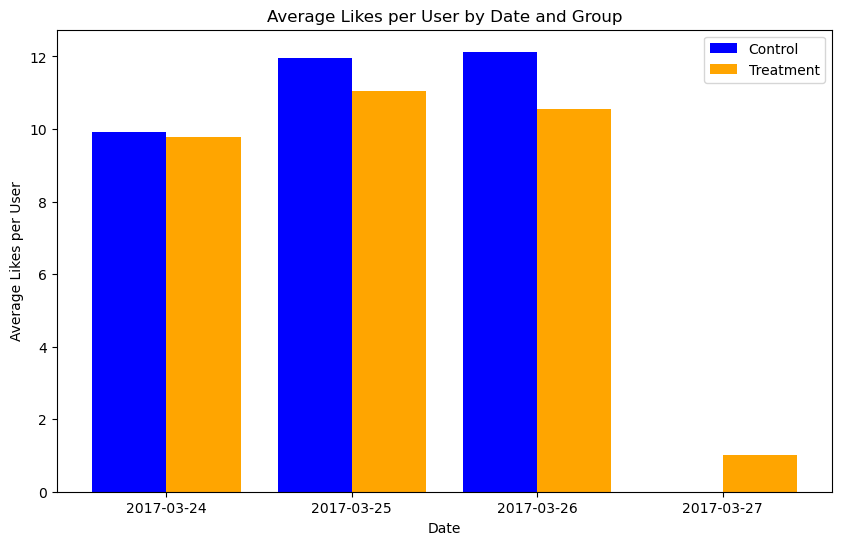

In [111]:
avg_likes_per_user = data_by_user_date.groupby(['time_stamp', 'group'])['likes_count'].mean().unstack()
fig, ax = plt.subplots(figsize=(10, 6))
dates = avg_likes_per_user.index
for i, date in enumerate(dates):
    control_likes = avg_likes_per_user.loc[date, 'control']
    treatment_likes = avg_likes_per_user.loc[date, 'treatment']
    ax.bar(i - 0.2, control_likes, color='blue', width=0.4, label='Control' if i == 0 else '')
    ax.bar(i + 0.2, treatment_likes, color='orange', width=0.4, label='Treatment' if i == 0 else '')
ax.set_xticks(range(len(dates)))
ax.set_xticklabels(dates, rotation=0)
ax.set_xlabel('Date')
ax.set_ylabel('Average Likes per User')
ax.set_title('Average Likes per User by Date and Group')
ax.legend(loc='upper right')
plt.show()

Із аналізу видно, що контрольна група переважала тестову групу за показником "середня кількість лайків на 1 юзера" в усі дні протягом тесту.

### Результати АВ-тесту у розрізі гендеру

In [120]:
data_by_user_gender = data_test.groupby(['sender_id', 'gender', 'group']).size().reset_index(name='likes_count')
pivot_table_gender = pd.pivot_table(data_by_user_gender, 
                              index=['group', 'gender'], 
                              values=['sender_id', 'likes_count'], 
                              aggfunc={'sender_id': 'count', 'likes_count': ['sum', 'mean']})
pivot_table_gender.columns = ['avg_likes_per_user', 'total_likes', 'total_users']
pivot_table_gender = pivot_table.reset_index()
print(pivot_table_gender)

   index      group gender  avg_likes_per_user  total_likes  total_users
0      0    control      f            8.268692         7078          856
1      1    control      m           17.613240        50550         2870
2      2  treatment      f            8.773300         6966          794
3      3  treatment      m           15.288154        42975         2811
4      4  treatment     nb           11.500000           23            2


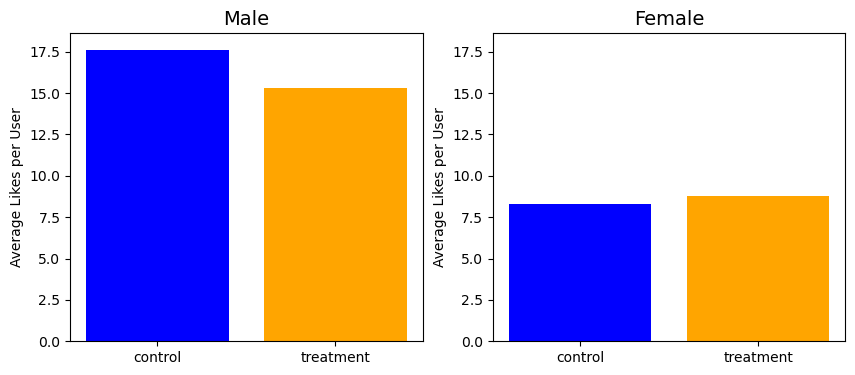

In [124]:
m_data = pivot_table_gender[pivot_table_gender['gender'] == 'm']
f_data = pivot_table_gender[pivot_table_gender['gender'] == 'f']

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

control_m_data = m_data[m_data['group'] == 'control']
treatment_m_data = m_data[m_data['group'] == 'treatment']
axs[0].bar(control_m_data['group'], control_m_data['avg_likes_per_user'], color='blue', label='Control')
axs[0].bar(treatment_m_data['group'], treatment_m_data['avg_likes_per_user'], color='orange', label='Treatment')
axs[0].set_title('Male', fontsize=14)
axs[0].set_ylabel('Average Likes per User')
axs[0].set_ylim(0, max(m_data['avg_likes_per_user'].max(), f_data['avg_likes_per_user'].max()) + 1)

control_f_data = f_data[f_data['group'] == 'control']
treatment_f_data = f_data[f_data['group'] == 'treatment']
axs[1].bar(control_f_data['group'], control_f_data['avg_likes_per_user'], color='blue', label='Control')
axs[1].bar(treatment_f_data['group'], treatment_f_data['avg_likes_per_user'], color='orange', label='Treatment')
axs[1].set_title('Female', fontsize=14)
axs[1].set_ylabel('Average Likes per User')
axs[1].set_ylim(0, max(m_data['avg_likes_per_user'].max(), f_data['avg_likes_per_user'].max()) + 1)

plt.show()

Оскільки серед жінок тестова група показала вищу кількість лайків, ніж контрольна група, є сенс оцінити статистичну значущість для обох сегментів окремо: жінки та чоловіки

### Тест Стьюдента для оцінки статистичної значущості результатів АВ-тестування - сегмент "Жінки"

In [138]:
condition_control_f = (data_by_user_gender['group'] == 'control') & (data_by_user_gender['gender'] == 'f')
array_control_f = data_by_user_gender.loc[condition_control_f, 'likes_count'].values

condition_treatment_f = (data_by_user_gender['group'] == 'treatment') & (data_by_user_gender['gender'] == 'f')
array_treatment_f = data_by_user_gender.loc[condition_treatment_f, 'likes_count'].values

# Дані по контрольній групі
control_likes_per_user_f = np.array(array_control_f)
control_users_f = len(control_likes_per_user_f)

# Дані по тестовій групі
treatment_likes_per_user_f = np.array(array_treatment_f)
treatment_users_f = len(treatment_likes_per_user_f)

# Розрахунок середнього значення на стандартного відхилення для кількості лайків на користувача
control_mean_f = np.mean(control_likes_per_user_f)
control_std_f = np.std(control_likes_per_user_f, ddof=1) 
treatment_mean_f = np.mean(treatment_likes_per_user_f)
treatment_std_f = np.std(treatment_likes_per_user_f, ddof=1)

# t-test
t_statistic_f, p_value_f = stats.ttest_ind_from_stats(mean1=control_mean_f, std1=control_std_f, nobs1=control_users_f,
                                                  mean2=treatment_mean_f, std2=treatment_std_f, nobs2=treatment_users_f)

# Вивести ключову інформацію та висновок щодо статистичної значущості тесту
print(f"Control avg_likes_per_user: {round(control_mean_f,2)}")
print(f"Variant avg_likes_per_user: {round(treatment_mean_f,2)}\n")
print(f"Control standard deviation: {round(control_std_f,2)}")
print(f"Variant standard deviation: {round(treatment_std_f,2)}\n")
print(f"p-value: {round(p_value_f,3)}\n")
if p_value_f <= 0.05:
    print("✅ Різниця є статистично значущою")
else:
    print("❌ Різниця НЕ є статистично значущою")

Control avg_likes_per_user: 8.27
Variant avg_likes_per_user: 8.77

Control standard deviation: 15.81
Variant standard deviation: 16.83

p-value: 0.53

❌ Різниця НЕ є статистично значущою


### Тест Стьюдента для оцінки статистичної значущості результатів АВ-тестування - сегмент "Чоловіки"

In [139]:
condition_control_m = (data_by_user_gender['group'] == 'control') & (data_by_user_gender['gender'] == 'm')
array_control_m = data_by_user_gender.loc[condition_control_m, 'likes_count'].values

condition_treatment_m = (data_by_user_gender['group'] == 'treatment') & (data_by_user_gender['gender'] == 'm')
array_treatment_m = data_by_user_gender.loc[condition_treatment_m, 'likes_count'].values

# Дані по контрольній групі
control_likes_per_user_m = np.array(array_control_m)
control_users_m = len(control_likes_per_user_m)

# Дані по тестовій групі
treatment_likes_per_user_m = np.array(array_treatment_m)
treatment_users_m = len(treatment_likes_per_user_m)

# Розрахунок середнього значення на стандартного відхилення для кількості лайків на користувача
control_mean_m = np.mean(control_likes_per_user_m)
control_std_m = np.std(control_likes_per_user_m, ddof=1) 
treatment_mean_m = np.mean(treatment_likes_per_user_m)
treatment_std_m = np.std(treatment_likes_per_user_m, ddof=1)

# t-test
t_statistic_m, p_value_m = stats.ttest_ind_from_stats(mean1=control_mean_m, std1=control_std_m, nobs1=control_users_m,
                                                  mean2=treatment_mean_m, std2=treatment_std_m, nobs2=treatment_users_m)

# Вивести ключову інформацію та висновок щодо статистичної значущості тесту
print(f"Control avg_likes_per_user: {round(control_mean_m,2)}")
print(f"Variant avg_likes_per_user: {round(treatment_mean_m,2)}\n")
print(f"Control standard deviation: {round(control_std_m,2)}")
print(f"Variant standard deviation: {round(treatment_std_m,2)}\n")
print(f"p-value: {round(p_value_m,3)}\n")
if p_value_m <= 0.05:
    print("✅ Різниця є статистично значущою")
else:
    print("❌ Різниця НЕ є статистично значущою")

Control avg_likes_per_user: 17.61
Variant avg_likes_per_user: 15.29

Control standard deviation: 50.09
Variant standard deviation: 28.23

p-value: 0.032

✅ Різниця є статистично значущою


Отже, для жінок різниця в кількості лайків між тестовою та контрольною групами НЕ є значущою, а для чоловіків різниця статистично значуща. При цьому, чоловіки становлять більшу частину аудиторії. Це є додатковим аргументом на користь того, що тестову версію іконки варто відхилити і залишити базовий варіант (іконка-сердечко).

### Результати АВ-тесту у розрізі когорти (дати реєстрації користувача)

In [143]:
data_by_user_cohort = data_test.groupby(['sender_id','reg_date', 'group']).size().reset_index(name='likes_count')
pivot_table_cohort = pd.pivot_table(data_by_user_cohort, 
                              index=['group', 'reg_date'], 
                              values=['sender_id', 'likes_count'], 
                              aggfunc={'sender_id': 'count', 'likes_count': ['sum', 'mean']})
pivot_table_cohort.columns = ['avg_likes_per_user', 'total_likes', 'total_users']
pivot_table_cohort = pivot_table_cohort.reset_index()
print(pivot_table_cohort)

         group    reg_date  avg_likes_per_user  total_likes  total_users
0      control  2017-01-01           69.090909         1520           22
1      control  2017-01-02           28.640000          716           25
2      control  2017-01-03           13.620690          395           29
3      control  2017-01-04            5.360000          134           25
4      control  2017-01-05           12.785714          358           28
..         ...         ...                 ...          ...          ...
165  treatment  2017-03-22           12.625000         1010           80
166  treatment  2017-03-23           14.506494         1117           77
167  treatment  2017-03-24           14.538117         3242          223
168  treatment  2017-03-25           13.817949         5389          390
169  treatment  2017-03-26           10.579125         3142          297

[170 rows x 5 columns]


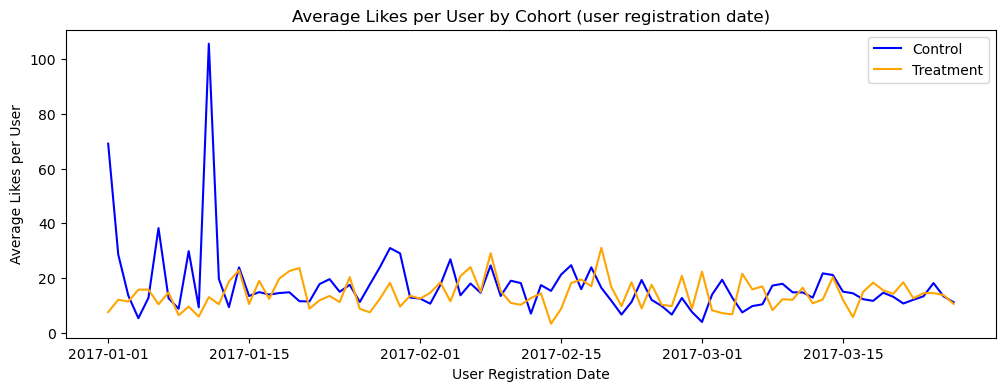

In [153]:
control_data = pivot_table_cohort[pivot_table_cohort['group'] == 'control']
treatment_data = pivot_table_cohort[pivot_table_cohort['group'] == 'treatment']
plt.plot(control_data['reg_date'], control_data['avg_likes_per_user'], color='blue', label='Control')
plt.plot(treatment_data['reg_date'], treatment_data['avg_likes_per_user'], color='orange', label='Treatment')
plt.xlabel('User Registration Date')
plt.ylabel('Average Likes per User')
plt.title('Average Likes per User by Cohort (user registration date)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.gcf().set_size_inches(12, 4)
plt.show()

Користувачі контрольної групи, які зареєструвалися 2017-01-01 і 2017-01-11, показують екстремально високу кількість лайків.  
У рамках даного аналізу, немає змоги проаналізувати природу такої активності, однак навіть якщо ці 2 когорти виключити як потенційні аномалії, кількість лайків у контрольній групі всерівно буде вищою за тестову групу. Тому це не впливає на раніше зроблені висновки.

In [163]:
data_by_user_cohort['reg_date'] = pd.to_datetime(data_by_user_cohort['reg_date'])
control_avg_likes = data_by_user_cohort[(data_by_user_cohort['group'] == 'control') & 
                                         (~data_by_user_cohort['reg_date'].isin(['2017-01-01', '2017-01-11']))]['likes_count'].mean()
treatment_avg_likes = data_by_user_cohort[(data_by_user_cohort['group'] == 'treatment') &
                                         (~data_by_user_cohort['reg_date'].isin(['2017-01-01', '2017-01-11']))]['likes_count'].mean()

print(f"Average likes count for Control group: {round(control_avg_likes,2)}")
print(f"Average likes count for Treatment group: {round(treatment_avg_likes,2)}")

Average likes count for Control group: 14.58
Average likes count for Treatment group: 13.89


# 3. Висновки і пропозиції

Контрольна група показала вищу кількість лайків на 1 користувача, ніж тестова група. Крім цього, для чоловіків, які становлять основну частину аудиторії, перевага є статистично значущою. Отже, __висновок: відхилити тестову версію (іконка-галочка) і залишити базовий варіант (іконка-сердечко)__.  

Контрольна група має вищу кількість лайків на 1 користувача, ніж тестова група, не тільки загалом, але і якщо деталізувати результати за платформою, датою тесту і когортою (датою реєстрації користувача). Відмінність є тільки для гендеру - жінки у тестовій групі показали вищу кількість лайків, ніж жінки у контрольній групі. Проте, жінки становлять значно меншу частину аудиторії, ніж чоловіки, і різниця в кількості лайків між тестовою та контрольною групою несуттєва і вона НЕ є статистично значущою.